# Example 03: Manual calculation of Cu melting temperature

In this example, the melting temperature for Cu is calculated using a combination of free energy calculation and temperature sweep.

The EAM potential we will use is : [Mishin, Y., M. J. Mehl, D. A. Papaconstantopoulos, A. F. Voter, and J. D. Kress. “Structural Stability and Lattice Defects in Copper: Ab Initio , Tight-Binding, and Embedded-Atom Calculations.” Physical Review B 63, no. 22 (May 21, 2001): 224106.](https://doi.org/10.1103/PhysRevB.63.224106)

The calculation block gives the input conditions at which the calculation is carried out. First of all, the `mode` is `ts`, a temperature sweep over the temperature range given in the `temperature` keyword will be done. `FCC` and `LQD` lattice are chosen, the former for `solid` and the latter for `liquid`. The potential file is specified in `pair_coeff` command in the `md` block.

The calculation can be run by,
```
calphy -i input.yaml
```
Once submitted, it should give a message `Total number of 2 calculations found`. It will also create a set of folders with the names `mode-lattice-temperature-pressure`. In this case, there will be `ts-FCC-1200-0` and `ts-LQD-1200-0`. If there are any errors in the calculation, it will be recoreded in `ts-FCC-1200-0.sub.err` and `ts-LQD-1200-0.sub.err`. Once the calculation starts, a log file called `tint.log` will be created in the aforementioned folders. For example, the `tint.log` file in `ts-FCC-1200-0` is shown below:

```
2021-07-08 15:12:02,873 calphy.helpers INFO     At count 1 mean pressure is -5.337803 with 12.625936 vol/atom
2021-07-08 15:12:09,592 calphy.helpers INFO     At count 2 mean pressure is -5.977502 with 12.625639 vol/atom
2021-07-08 15:12:15,790 calphy.helpers INFO     At count 3 mean pressure is -6.557647 with 12.623906 vol/atom
2021-07-08 15:12:22,059 calphy.helpers INFO     At count 4 mean pressure is -2.755662 with 12.624017 vol/atom
2021-07-08 15:12:28,157 calphy.helpers INFO     At count 5 mean pressure is -1.306381 with 12.625061 vol/atom
2021-07-08 15:12:34,405 calphy.helpers INFO     At count 6 mean pressure is 0.718567 with 12.625150 vol/atom
2021-07-08 15:12:40,595 calphy.helpers INFO     At count 7 mean pressure is 2.185729 with 12.625295 vol/atom
2021-07-08 15:12:47,020 calphy.helpers INFO     At count 8 mean pressure is 2.162312 with 12.625414 vol/atom
2021-07-08 15:12:53,323 calphy.helpers INFO     At count 9 mean pressure is 1.137092 with 12.624953 vol/atom
2021-07-08 15:12:59,692 calphy.helpers INFO     At count 10 mean pressure is 0.377612 with 12.625385 vol/atom
2021-07-08 15:12:59,693 calphy.helpers INFO     finalized vol/atom 12.625385 at pressure 0.377612
2021-07-08 15:12:59,693 calphy.helpers INFO     Avg box dimensions x: 18.483000, y: 18.483000, z:18.483000
2021-07-08 15:13:05,878 calphy.helpers INFO     At count 1 mean k is 1.413201 std is 0.072135
2021-07-08 15:13:12,088 calphy.helpers INFO     At count 2 mean k is 1.398951 std is 0.065801
2021-07-08 15:13:12,090 calphy.helpers INFO     finalized sprint constants
2021-07-08 15:13:12,090 calphy.helpers INFO     [1.4]

```

The file gives some information about the preparation stage. It can be seen that at loop 10, the pressure is converged and very close to the 0 value we specified in the input file. After the pressure is converged, box dimensions are fixed, and the spring constants for the Einstein crystal are calculated.  

The `ts` mode consists of two stages, the first step is the calculation of free energy at 1200 K, followed by a sweep until 1400 K. The results of the free energy calculation is recorded in `report.yaml` file. The file is shown below:

```
average:
  spring_constant: '1.4'
  vol/atom: 12.625384980886036
input:
  concentration: '1'
  element: Cu
  lattice: fcc
  pressure: 0.0
  temperature: 1200
results:
  error: 0.0
  free_energy: -4.071606995367944
  pv: 0.0
  reference_system: -0.7401785806445611
  work: -3.331428414723382
```

In the file, the average and input quantities are recorded. The more interesting block is the `results` block. Here the calculated free energy value in eV/atom is given in the `free_energy` key. The free energy of the reference system is given in `reference_system` and the work done in switching is under `work`. The `error` key gives the error in the calculation. In this case, its 0 as we ran only a single loop (see `nsims`). The `report.yaml` file for liquid looks somewhat similar.

```
average:
  density: 0.075597559457131
  vol/atom: 13.227983329718013
input:
  concentration: '1'
  element: Cu
  lattice: fcc
  pressure: 0.0
  temperature: 1200
results:
  error: 0.0
  free_energy: -4.058226884054426
  pv: 0.0
  reference_system: 0.6852066332000204
  work: 4.743433517254447
```

The main difference here is that under the `average` block, the `density` is reported instead of `spring_constant`.

The variation of the free energy within the temperature range is given in the `temperature_sweep.dat` files instead of each of the folders. The file contains three columns, temperature, free energy and the error in free energy. The files are read in and plotted below.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
st, sfe, sferr = np.loadtxt("ts-FCC-1200-0/temperature_sweep.dat", unpack=True)
lt, lfe, lferr = np.loadtxt("ts-LQD-1200-0/temperature_sweep.dat", unpack=True)

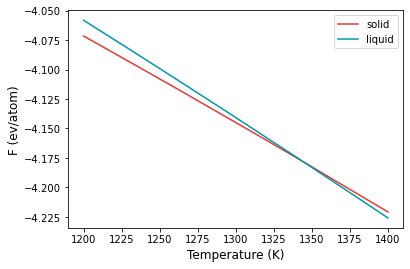

In [4]:
plt.plot(st, sfe, color="#E53935", label="solid")
plt.plot(lt, lfe, color="#0097A7", label="liquid")
plt.xlabel("Temperature (K)", fontsize=12)
plt.ylabel("F (ev/atom)", fontsize=12)
plt.legend()
plt.savefig("tm.png", dpi=300, bbox_inches="tight")

From the plot, at temperatures below 1300 K, solid is the more stable structure with lower free energy. Around 1340 K, liquid becomes the more stable structure. We can find the temperature at which the free energy of both phases are equal, which is the melting temperature.

In [5]:
args = np.argsort(np.abs(sfe-lfe))
print(st[args[0]], "K")

1344.3095672974282 K
